# Let's look at the raw data, specifically the washover stats

In [1]:
# Import packages we need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os,shutil

In [27]:
#load the labels
#round 2 labels
#labeler_data = pd.read_csv('../data/tables/labels/Priority_1604952200293.csv')
#round 3 labels
labeler_data = pd.read_csv('../data/tables/labels/Priority_1613057474309.csv')

In [ ]:
priority = labeler_data

In [3]:
list(priority.columns)

['_id',
 'userId',
 'catalogId',
 'archiveId',
 'imageId',
 'date',
 'catalog',
 'archive',
 'image',
 'water',
 'devType',
 'washoverType',
 'dmgType',
 'impactType',
 'terrianType',
 'additionalComments']

In [4]:
priority = priority.drop(['catalog','date', 'water','devType','dmgType','impactType','terrianType','additionalComments'], axis = 1) 
priority = priority.replace({np.NaN: 'noWashover'})
priority.head()

,_id,userId,catalogId,archiveId,imageId,archive,image,washoverType
0,5f5c1dce7bb1cd50684f79be,5f4c002a9cdb9b001675a8e2,5f5c1c37016e86108aec3c3a,5f5c1c37016e86108aec3c3b,5f5c1c37016e86108aec3c81,Florence,P26058806.jpg,noWashover
1,5f5c207a7bb1cd50684f79c1,5f4c002a9cdb9b001675a8e2,5f5c1c37016e86108aec3c3a,5f5c1c37016e86108aec3d05,5f5c1c37016e86108aec3d5e,Michael,S28468531.jpg,noWashover
2,5f6260617bb1cd50684f79c7,5f4c002a9cdb9b001675a8e2,5f5c1c37016e86108aec3c3a,5f5c1c37016e86108aec3d05,5f5c1c37016e86108aec3d58,Michael,S28466899.jpg,noWashover
3,5f62609b7bb1cd50684f79ca,5f4c002a9cdb9b001675a8e2,5f5c1c37016e86108aec3c3a,5f5c1c37016e86108aec3ca0,5f5c1c37016e86108aec3ced,Isaias,S21773987.jpg,noWashover
4,5f6290357bb1cd50684f79cc,5f4c002a9cdb9b001675a8e2,5f5c1c37016e86108aec3c3a,5f5c1c37016e86108aec3c3b,5f5c1c37016e86108aec3c67,Florence,P26057665.jpg,noWashover


In [5]:
washData = priority[['imageId', 'userId', 'washoverType']]
washData.head()

,imageId,userId,washoverType
0,5f5c1c37016e86108aec3c81,5f4c002a9cdb9b001675a8e2,noWashover
1,5f5c1c37016e86108aec3d5e,5f4c002a9cdb9b001675a8e2,noWashover
2,5f5c1c37016e86108aec3d58,5f4c002a9cdb9b001675a8e2,noWashover
3,5f5c1c37016e86108aec3ced,5f4c002a9cdb9b001675a8e2,noWashover
4,5f5c1c37016e86108aec3c67,5f4c002a9cdb9b001675a8e2,noWashover


In [6]:
#keep the hash data to join later
hashes = priority[['imageId','archiveId','archive','image']]

In [7]:
# pivot the wash data
washDataPivot = washData.pivot(index= 'imageId', columns='userId')
washDataPivot.head()

washoverType                           \
userId                   5f4c002a9cdb9b001675a8e2 5f4f13135463f70016a500ed   
imageId                                                                      
5f5c1c37016e86108aec3c3c               noWashover                      NaN   
5f5c1c37016e86108aec3c3d               noWashover                      NaN   
5f5c1c37016e86108aec3c3e               noWashover                      NaN   
5f5c1c37016e86108aec3c3f               noWashover                      NaN   
5f5c1c37016e86108aec3c40               noWashover                      NaN   

                                                                            \
userId                   5f6635628cb36a001698427b 5f77871024f95e0018305349   
imageId                                                                      
5f5c1c37016e86108aec3c3c               noWashover               noWashover   
5f5c1c37016e86108aec3c3d               noWashover               noWashover   
5f5c1c37016e86108aec3c3e               noWashover               noWashover   
5f5c1c37016e86108aec3c3f               noWashover               noWashover   
5f5c1c37016e86108aec3c40               noWashover               noWashover   

                                                                            \
userId                   5f7af56443360b001790063d 5f7c8c4287bff50017610126   
imageId                                                                      
5f5c1c37016e86108aec3c3c               noWashover               noWashover   
5f5c1c37016e86108aec3c3d               noWashover               noWashover   
5f5c1c37016e86108aec3c3e                 washover               noWashover   
5f5c1c37016e86108aec3c3f               noWashover               noWashover   
5f5c1c37016e86108aec3c40               noWashover               noWashover   

                                                                            \
userId                   5f89a4957c0f40001652c05d 5f89c25b67d0e30016a5e70a   
imageId                                                                      
5f5c1c37016e86108aec3c3c               noWashover               noWashover   
5f5c1c37016e86108aec3c3d               noWashover               noWashover   
5f5c1c37016e86108aec3c3e                 washover               noWashover   
5f5c1c37016e86108aec3c3f                 washover               noWashover   
5f5c1c37016e86108aec3c40               noWashover               noWashover   

                                                                            \
userId                   5f8f5f59e4dac20017f9070e 5fa4542fec49d20016f772a8   
imageId                                                                      
5f5c1c37016e86108aec3c3c                      NaN                      NaN   
5f5c1c37016e86108aec3c3d                      NaN                      NaN   
5f5c1c37016e86108aec3c3e                      NaN                      NaN   
5f5c1c37016e86108aec3c3f                      NaN                      NaN   
5f5c1c37016e86108aec3c40                      NaN                      NaN   

                                                                            \
userId                   5fbc7ccabf106c0017b864a0 5fc7dc859f59bc0016211439   
imageId                                                                      
5f5c1c37016e86108aec3c3c                      NaN                      NaN   
5f5c1c37016e86108aec3c3d                      NaN                      NaN   
5f5c1c37016e86108aec3c3e                      NaN                      NaN   
5f5c1c37016e86108aec3c3f                      NaN                      NaN   
5f5c1c37016e86108aec3c40                      NaN                      NaN   

                                                                            
userId                   5ff24c3448a4570013d1a9ed 600994de5eff87001694a117  
imageId                                                                     
5f5c1c37016e86108aec3c3c                      NaN       

In [10]:
#save it to a file
washDataPivot.to_csv('../data/tables/labels/Pivoted_Wash.csv')

### Now investigate the data

In [11]:
wash = pd.read_csv('../data/tables/labels/Pivoted_Wash.csv', skiprows = 2)
del wash ['Unnamed: 2']
#del wash ['Unnamed: 9']
#del wash ['Unnamed: 10']
wash.head()

,imageId,Unnamed: 1,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,5f5c1c37016e86108aec3c3c,noWashover,noWashover,noWashover,noWashover,noWashover,noWashover,noWashover,NaN,NaN,NaN,NaN,NaN,NaN
1,5f5c1c37016e86108aec3c3d,noWashover,noWashover,noWashover,noWashover,noWashover,noWashover,noWashover,NaN,NaN,NaN,NaN,NaN,NaN
2,5f5c1c37016e86108aec3c3e,noWashover,noWashover,noWashover,washover,noWashover,washover,noWashover,NaN,NaN,NaN,NaN,NaN,NaN
3,5f5c1c37016e86108aec3c3f,noWashover,noWashover,noWashover,noWashover,noWashover,washover,noWashover,NaN,NaN,NaN,NaN,NaN,NaN
4,5f5c1c37016e86108aec3c40,noWashover,noWashover,noWashover,noWashover,noWashover,noWashover,noWashover,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
wash = wash.replace('noWashover', 0)
wash = wash.replace('washover', 1)
wash.head()

,imageId,Unnamed: 1,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,5f5c1c37016e86108aec3c3c,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,5f5c1c37016e86108aec3c3d,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,5f5c1c37016e86108aec3c3e,0,0.0,0.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,5f5c1c37016e86108aec3c3f,0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5f5c1c37016e86108aec3c40,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#add a smmary column to count washover votes
col_list= list(wash)
col_list.remove('imageId')
wash['wash_votes'] = wash[col_list].sum(axis=1)
wash["wash_votes"] = pd.to_numeric(wash["wash_votes"], errors='coerce')
wash.head()

#save to file
#wash.to_csv('../data/tables/washtally.csv')

,imageId,Unnamed: 1,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,wash_votes
0,5f5c1c37016e86108aec3c3c,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,5f5c1c37016e86108aec3c3d,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,5f5c1c37016e86108aec3c3e,0,0.0,0.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,5f5c1c37016e86108aec3c3f,0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,5f5c1c37016e86108aec3c40,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [14]:
#extract just the vote data
washScores = wash[['imageId','wash_votes']]
washScores

,imageId,wash_votes
0,5f5c1c37016e86108aec3c3c,0.0
1,5f5c1c37016e86108aec3c3d,0.0
2,5f5c1c37016e86108aec3c3e,2.0
3,5f5c1c37016e86108aec3c3f,1.0
4,5f5c1c37016e86108aec3c40,0.0
...,...,...
895,5fb2a167571d581e5543ce92,1.0
896,5fb2a167571d581e5543ce93,2.0
897,5fb2a167571d581e5543ce94,1.0
898,5fb2a167571d581e5543ce95,0.0


In [15]:
#join hashes and washScores
joinedWash = washScores.join(hashes.set_index('imageId'), on="imageId", how = 'left')
joinedWash= joinedWash.drop_duplicates()
joinedWash.to_csv('../data/tables/other/washtally.csv')
joinedWash

,imageId,wash_votes,archiveId,archive,image
0,5f5c1c37016e86108aec3c3c,0.0,5f5c1c37016e86108aec3c3b,Florence,C26047930.jpg
1,5f5c1c37016e86108aec3c3d,0.0,5f5c1c37016e86108aec3c3b,Florence,P26047210.jpg
2,5f5c1c37016e86108aec3c3e,2.0,5f5c1c37016e86108aec3c3b,Florence,P26054148.jpg
3,5f5c1c37016e86108aec3c3f,1.0,5f5c1c37016e86108aec3c3b,Florence,P26054260.jpg
4,5f5c1c37016e86108aec3c40,0.0,5f5c1c37016e86108aec3c3b,Florence,P26054311.jpg
...,...,...,...,...,...
895,5fb2a167571d581e5543ce92,1.0,5fb2a167571d581e5543ce32,IsaiasWash3,S21775747.jpg
896,5fb2a167571d581e5543ce93,2.0,5fb2a167571d581e5543ce32,IsaiasWash3,S21775811.jpg
897,5fb2a167571d581e5543ce94,1.0,5fb2a167571d581e5543ce32,IsaiasWash3,S21775825.jpg
898,5fb2a167571d581e5543ce95,0.0,5fb2a167571d581e5543ce32,IsaiasWash3,S21775881.jpg


Text(0, 0.5, 'number of images')

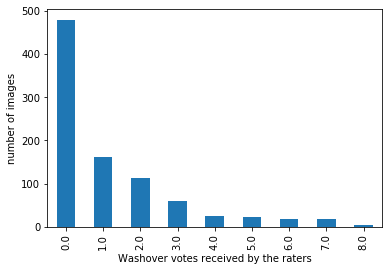

In [16]:
#plot it up
ax = joinedWash['wash_votes'].value_counts().sort_index().plot.bar()
ax.set_xlabel("Washover votes received by the raters")
ax.set_ylabel("number of images")

## Get data into shape for release

In [85]:
# make data into final zenodo form
releaseData = labeler_data
releaseData = releaseData.drop(['_id','catalogId', 'archiveId','date','catalog','additionalComments'], axis = 1)
releaseData = releaseData.drop(['imageId'], axis = 1)
releaseData = releaseData.rename({'water': 'allWater'}, axis=1)
releaseData.head()

,userId,archive,image,allWater,devType,washoverType,dmgType,impactType,terrianType
0,5f4c002a9cdb9b001675a8e2,Florence,P26058806.jpg,True,NaN,NaN,NaN,NaN,NaN
1,5f4c002a9cdb9b001675a8e2,Michael,S28468531.jpg,NaN,developed,noWashover,noDamage,NaN,"marsh,inland,river"
2,5f4c002a9cdb9b001675a8e2,Michael,S28466899.jpg,NaN,developed,noWashover,damage,NaN,inland
3,5f4c002a9cdb9b001675a8e2,Isaias,S21773987.jpg,NaN,developed,noWashover,noDamage,swash,sandyCoastline
4,5f4c002a9cdb9b001675a8e2,Florence,P26057665.jpg,NaN,undeveloped,noWashover,noDamage,"swash,collision",sandyCoastline


In [86]:
# replace NaN in devType, washoverType, dmgType,
values = {'allWater':'False', 'devType': 'undeveloped', 'washoverType': 'noWashover', 'dmgType': 'noDamage'}

releaseData = releaseData.fillna(value=values)
releaseData

,userId,archive,image,allWater,devType,washoverType,dmgType,impactType,terrianType
0,5f4c002a9cdb9b001675a8e2,Florence,P26058806.jpg,True,undeveloped,noWashover,noDamage,NaN,NaN
1,5f4c002a9cdb9b001675a8e2,Michael,S28468531.jpg,False,developed,noWashover,noDamage,NaN,"marsh,inland,river"
2,5f4c002a9cdb9b001675a8e2,Michael,S28466899.jpg,False,developed,noWashover,damage,NaN,inland
3,5f4c002a9cdb9b001675a8e2,Isaias,S21773987.jpg,False,developed,noWashover,noDamage,swash,sandyCoastline
4,5f4c002a9cdb9b001675a8e2,Florence,P26057665.jpg,False,undeveloped,noWashover,noDamage,"swash,collision",sandyCoastline
...,...,...,...,...,...,...,...,...,...
4521,5fc7dc859f59bc0016211439,Isaias3,S21773927.jpg,False,developed,noWashover,noDamage,"swash,collision",sandyCoastline
4522,5fc7dc859f59bc0016211439,Isaias3,S21773652.jpg,False,developed,noWashover,noDamage,"swash,collision","sandyCoastline,marsh,river"
4523,5fc7dc859f59bc0016211439,Isaias3,S21774032.jpg,False,developed,noWashover,noDamage,"swash,collision",sandyCoastline
4524,5fc7dc859f59bc0016211439,Isaias3,S21771045.jpg,False,developed,washover,noDamage,"swash,collision,overwash","sandyCoastline,marsh"


In [87]:
releaseData.shape

(4526, 9)

In [88]:
Threshold = releaseData[["userId","archive","image"]].groupby(['userId', 'archive']).count().reset_index()
#Threshold = Threshold[Threshold["image"] == 100].reset_index()
Threshold

,userId,archive,image
0,5f4c002a9cdb9b001675a8e2,Florence,100
1,5f4c002a9cdb9b001675a8e2,Florence3,100
2,5f4c002a9cdb9b001675a8e2,FlorenceWash3,100
3,5f4c002a9cdb9b001675a8e2,Isaias,100
4,5f4c002a9cdb9b001675a8e2,Isaias3,100
5,5f4c002a9cdb9b001675a8e2,IsaiasWash3,100
6,5f4c002a9cdb9b001675a8e2,Michael,100
7,5f4c002a9cdb9b001675a8e2,Michael3,100
8,5f4c002a9cdb9b001675a8e2,MichaelWash3,100
9,5f4f13135463f70016a500ed,Florence,1


In [89]:
#add a true column
Threshold.rename(columns = {"image": "total"}, inplace=True)

#join Threshold with releaseData
releaseData = releaseData.merge(Threshold, left_on = ['userId', 'archive'], right_on = ['userId', 'archive'])

# remove rows where total <100
releaseData = releaseData[releaseData["total"] == 100]
releaseData.head()

,userId,archive,image,allWater,devType,washoverType,dmgType,impactType,terrianType,total
0,5f4c002a9cdb9b001675a8e2,Florence,P26058806.jpg,True,undeveloped,noWashover,noDamage,NaN,NaN,100
1,5f4c002a9cdb9b001675a8e2,Florence,P26057665.jpg,False,undeveloped,noWashover,noDamage,"swash,collision",sandyCoastline,100
2,5f4c002a9cdb9b001675a8e2,Florence,P26059250.jpg,False,developed,washover,noDamage,"swash,collision,overwash",sandyCoastline,100
3,5f4c002a9cdb9b001675a8e2,Florence,P26060067.jpg,False,undeveloped,noWashover,noDamage,"swash,collision",sandyCoastline,100
4,5f4c002a9cdb9b001675a8e2,Florence,P26057539.jpg,False,undeveloped,washover,noDamage,"swash,collision,overwash",sandyCoastline,100


In [90]:
#replace user IDs with `User 1`, etc...
releaseData.shape
releaseData.userId.unique()

array(['5f4c002a9cdb9b001675a8e2', '5f77871024f95e0018305349',
       '5f6635628cb36a001698427b', '5f7af56443360b001790063d',
       '5f7c8c4287bff50017610126', '5f89a4957c0f40001652c05d',
       '5f89c25b67d0e30016a5e70a', '5fbc7ccabf106c0017b864a0',
       '5fc7dc859f59bc0016211439', '5f8f5f59e4dac20017f9070e',
       '600994de5eff87001694a117', '5fa4542fec49d20016f772a8',
       '5ff24c3448a4570013d1a9ed'], dtype=object)

In [91]:
releaseData['userId'] = pd.factorize(releaseData.userId)[0] + 1
releaseData.userId.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [92]:
releaseData.head()

,userId,archive,image,allWater,devType,washoverType,dmgType,impactType,terrianType,total
0,1,Florence,P26058806.jpg,True,undeveloped,noWashover,noDamage,NaN,NaN,100
1,1,Florence,P26057665.jpg,False,undeveloped,noWashover,noDamage,"swash,collision",sandyCoastline,100
2,1,Florence,P26059250.jpg,False,developed,washover,noDamage,"swash,collision,overwash",sandyCoastline,100
3,1,Florence,P26060067.jpg,False,undeveloped,noWashover,noDamage,"swash,collision",sandyCoastline,100
4,1,Florence,P26057539.jpg,False,undeveloped,washover,noDamage,"swash,collision,overwash",sandyCoastline,100


In [99]:
#replace column ittle with NOAA flight
releaseData = releaseData.rename({'archive': 'NOAA_flight'}, axis=1)

# replace archive with specific flight
releaseData = releaseData.replace('Florence','Florence_20180917a_jpgs')
releaseData = releaseData.replace('Michael', 'Michael_20181011a_jpgs')
releaseData = releaseData.replace('Isaias','Isaias_20200804a_jpgs')

# replace archive with specific flight
releaseData = releaseData.replace('Florence3','Florence_20180917a_jpgs')
releaseData = releaseData.replace('Michael3', 'Michael_20181011a_jpgs')
releaseData = releaseData.replace('Isaias3','Isaias_20200804a_jpgs')

# replace archive with specific flight
releaseData = releaseData.replace('FlorenceWash3','Florence_20180917a_jpgs')
releaseData = releaseData.replace('MichaelWash3', 'Michael_20181011a_jpgs')
releaseData = releaseData.replace('IsaiasWash3','Isaias_20200804a_jpgs')

releaseData.head()

,userId,NOAA_flight,image,allWater,devType,washoverType,dmgType,impactType,terrianType,total
0,1,Florence_20180917a_jpgs,P26058806.jpg,True,undeveloped,noWashover,noDamage,NaN,NaN,100
1,1,Florence_20180917a_jpgs,P26057665.jpg,False,undeveloped,noWashover,noDamage,"swash,collision",sandyCoastline,100
2,1,Florence_20180917a_jpgs,P26059250.jpg,False,developed,washover,noDamage,"swash,collision,overwash",sandyCoastline,100
3,1,Florence_20180917a_jpgs,P26060067.jpg,False,undeveloped,noWashover,noDamage,"swash,collision",sandyCoastline,100
4,1,Florence_20180917a_jpgs,P26057539.jpg,False,undeveloped,washover,noDamage,"swash,collision,overwash",sandyCoastline,100


In [100]:
#save release data
releaseData.to_csv('../data/tables/labels/ReleaseData2.csv',na_rep='NaN')

## Now we can go back to splitting the washover data based on votes:

In [104]:
washTally = pd.read_csv('../data/tables/other/washtally.csv')

washTally = washTally.drop(['Unnamed: 0','imageId', 'archiveId'], axis = 1)

# replace archive with specific flight
washTally = washTally.replace('Florence','Florence_20180917a_jpgs')
washTally = washTally.replace('Michael', 'Michael_20181011a_jpgs')
washTally = washTally.replace('Isaias','Isaias_20200804a_jpgs')

washTally = washTally.replace('Florence3','Florence_20180917a_jpgs')
washTally = washTally.replace('Michael3', 'Michael_20181011a_jpgs')
washTally = washTally.replace('Isaias3','Isaias_20200804a_jpgs')

washTally = washTally.replace('FlorenceWash3','Florence_20180917a_jpgs')
washTally = washTally.replace('MichaelWash3', 'Michael_20181011a_jpgs')
washTally = washTally.replace('IsaiasWash3','Isaias_20200804a_jpgs')

washTally.head()

,wash_votes,archive,image
0,0.0,Florence_20180917a_jpgs,C26047930.jpg
1,0.0,Florence_20180917a_jpgs,P26047210.jpg
2,2.0,Florence_20180917a_jpgs,P26054148.jpg
3,1.0,Florence_20180917a_jpgs,P26054260.jpg
4,0.0,Florence_20180917a_jpgs,P26054311.jpg


In [105]:
#add the path
washTally['Image_Path'] = '../data/pics/raw/' + washTally['archive'].astype(str) + '/' + washTally['image'].astype(str)
washTally.head()

,wash_votes,archive,image,Image_Path
0,0.0,Florence_20180917a_jpgs,C26047930.jpg,../data/pics/raw/Florence_20180917a_jpgs/C2604...
1,0.0,Florence_20180917a_jpgs,P26047210.jpg,../data/pics/raw/Florence_20180917a_jpgs/P2604...
2,2.0,Florence_20180917a_jpgs,P26054148.jpg,../data/pics/raw/Florence_20180917a_jpgs/P2605...
3,1.0,Florence_20180917a_jpgs,P26054260.jpg,../data/pics/raw/Florence_20180917a_jpgs/P2605...
4,0.0,Florence_20180917a_jpgs,P26054311.jpg,../data/pics/raw/Florence_20180917a_jpgs/P2605...


In [106]:
# for i in range(0,8):
#     #pull out the list from the df
#     Tally = washTally[washTally['wash_votes'] == i]
#     TallyList = Tally['Image_Path'].tolist()
#     #TallyList
#     TallyFolder = '../data/pics/labelertoModel/Tallies/' + str(i)
#     print(TallyFolder)
#     #move those on the list
#     for f in TallyList:
#         shutil.copy(f, TallyFolder)

In [107]:
# #wash no wash split
# for i in range(0,8):
#     #pull out the list from the df
#     Tally = washTally[washTally['wash_votes'] == i]
#     TallyList = Tally['Image_Path'].tolist()
#     if i == 0:
#         TallyFolder = '../data/pics/labelertoModel/Split3/nowash'
#     elif i == 1:
#         TallyFolder = '../data/pics/labelertoModel/Split3/undecided'
#     else:
#         TallyFolder = '../data/pics/labelertoModel/Split3/wash'
#     print(TallyFolder)
#     #move those on the list
#     for f in TallyList:
#         shutil.copy(f, TallyFolder)

In [109]:
#wash no wash split
for i in range(0,9):
    #pull out the list from the df
    Tally = washTally[washTally['wash_votes'] == i]
    TallyList = Tally['Image_Path'].tolist()
    if i == 0:
        TallyFolder = '../data/pics/labelertoModel/AllRoundsThree/nowash'
    else:
        TallyFolder = '../data/pics/labelertoModel/AllRoundsThree/wash'
    print(TallyFolder)
    #move those on the list
    for f in TallyList:
        shutil.copy(f, TallyFolder)

../data/pics/labelertoModel/AllRoundsThree/nowash
../data/pics/labelertoModel/AllRoundsThree/wash
../data/pics/labelertoModel/AllRoundsThree/wash
../data/pics/labelertoModel/AllRoundsThree/wash
../data/pics/labelertoModel/AllRoundsThree/wash
../data/pics/labelertoModel/AllRoundsThree/wash
../data/pics/labelertoModel/AllRoundsThree/wash
../data/pics/labelertoModel/AllRoundsThree/wash
../data/pics/labelertoModel/AllRoundsThree/wash
